In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("ecommerce.csv")

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


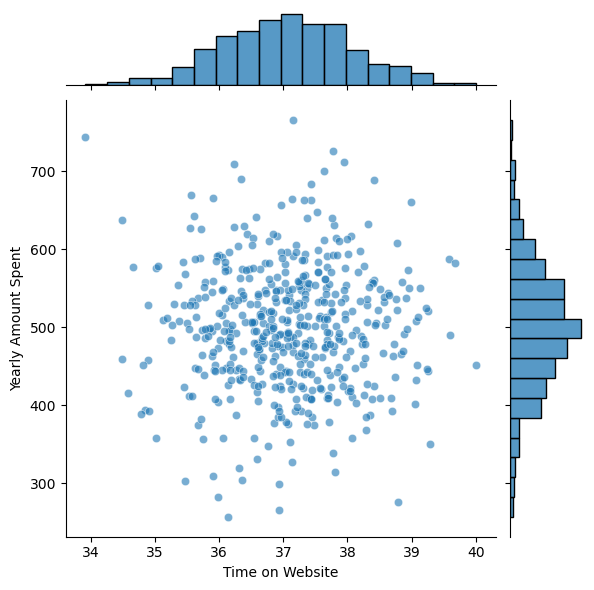

In [12]:
# EDA - Exploratory Data Analysis

# setting the alpha lower helps with the clarity of the visualisation 
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data = df, alpha = 0.6)

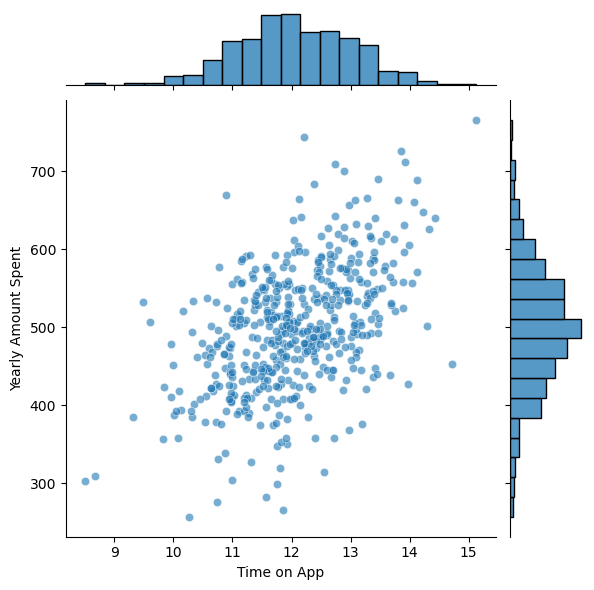

In [13]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data = df, alpha = 0.6)

Here we can see a clearer correlation.

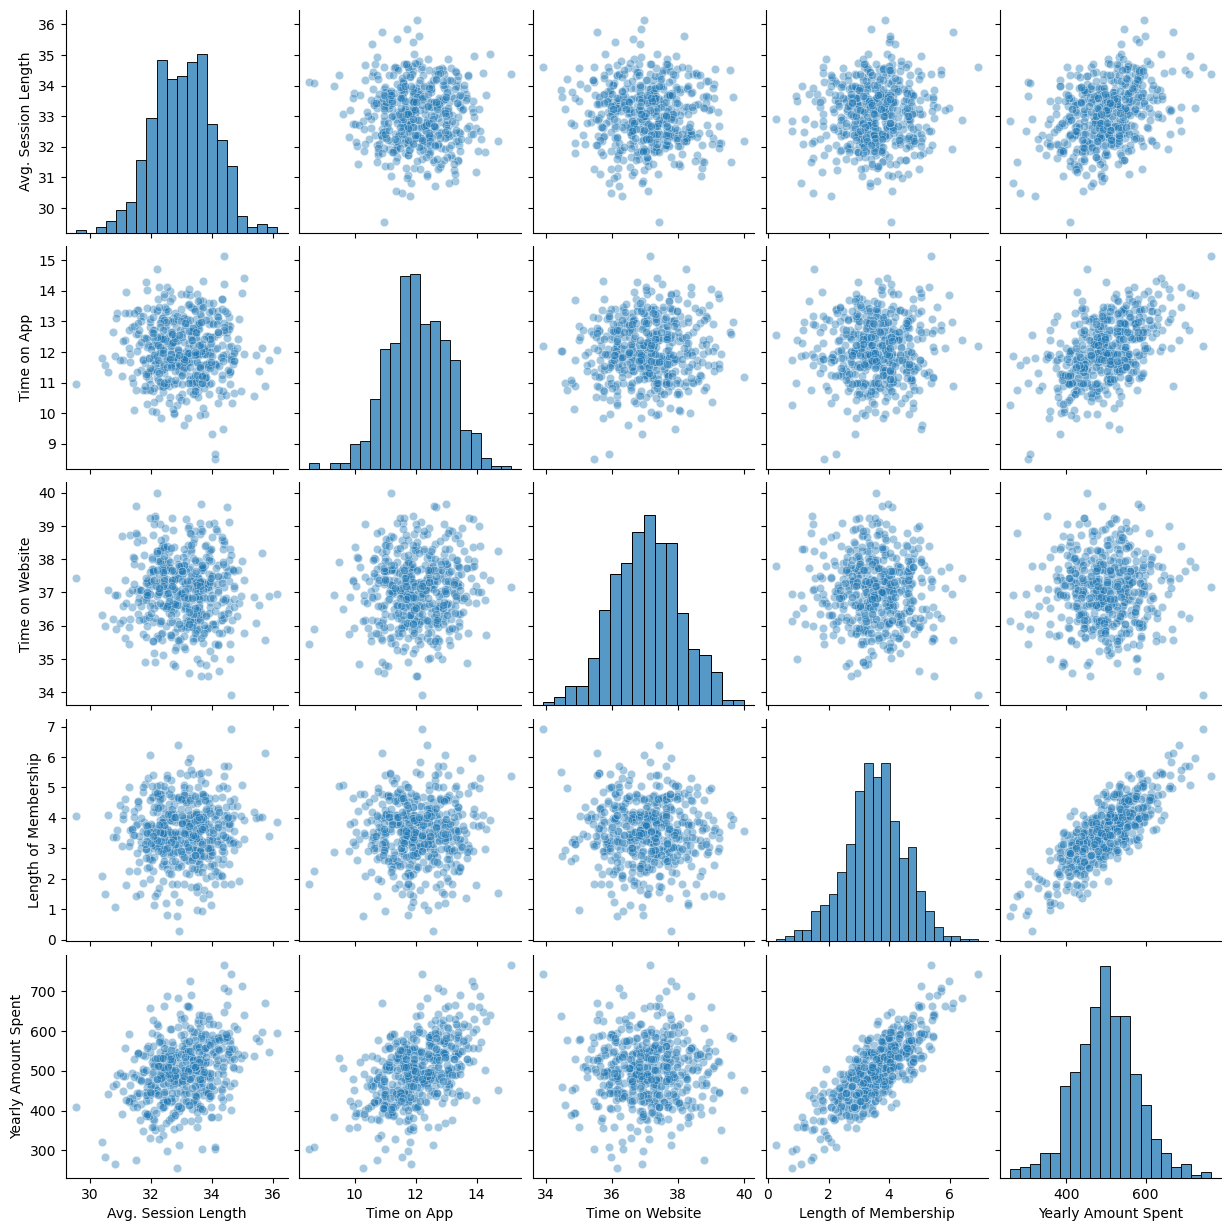

In [16]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha' : 0.4})

We compare all numeric variables exploring their connections. We need to take a closer look at how different variables affect the 'Yearly Amount Spent'.

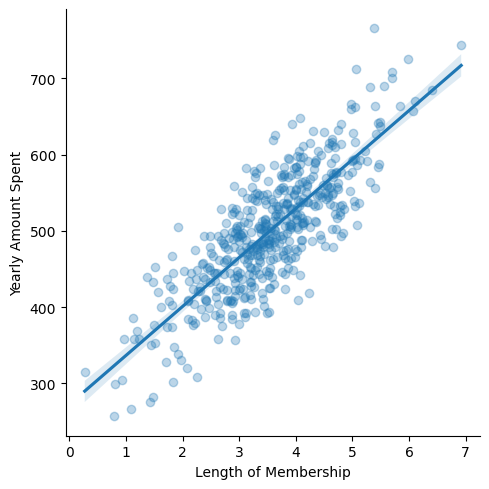

In [20]:
sns.lmplot(x = 'Length of Membership',
           y = 'Yearly Amount Spent',
           data = df,
           scatter_kws = {'alpha' : 0.3}
          )

In [21]:
from sklearn.model_selection import train_test_split

In [30]:
X = df[['Time on App', 'Time on Website', 'Avg. Session Length', 'Length of Membership']] # predictiors
Y = df['Yearly Amount Spent'] # target variable

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [34]:
# training the model
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train, Y_train)

LinearRegression()

In [39]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                           Coef
Time on App           38.481719
Time on Website        0.925776
Avg. Session Length   25.416042
Length of Membership  61.947457


Coefficients describe how important each of the variables is to the model.

In [40]:
# predictions

In [41]:
predictions = lm.predict(X_test)

In [42]:
predictions

array([615.89317114, 560.76042726, 547.05498813, 577.32875317,
       587.85440185, 501.59714004, 518.7523783 , 532.93316027,
       589.99908044, 454.43113458, 456.73589408, 534.65352948,
       399.44588473, 505.321634  , 557.20276924, 550.90606131,
       488.5140652 , 500.34138258, 507.63464998, 551.92920459,
       482.0682754 , 455.48367191, 531.83880264, 399.69076074,
       715.68300124, 530.30652875, 506.44563579, 606.85879394,
       438.74278808, 404.69341701, 435.63950848, 503.01787681,
       442.95143303, 569.08052769, 482.87432197, 420.70170404,
       531.16358782, 539.11076743, 497.49016011, 395.91695508,
       507.49498783, 407.99603064, 618.77506125, 522.30917283,
       557.29678599, 414.50482159, 519.48910739, 411.50658449,
       457.51192678, 498.38458386, 404.31138773, 337.07168791,
       481.75511107, 673.22561188, 553.18095934, 447.09911252,
       450.32598831, 401.45185879, 512.44700136, 540.2734644 ,
       444.90893369, 518.32469135, 572.37340325, 393.04

Text(0.5, 1.0, 'Evaluation of the LM model accuracy')

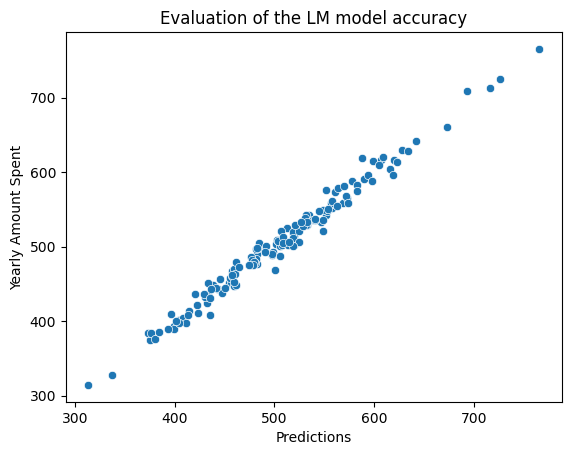

In [46]:
sns.scatterplot(x = predictions, y = Y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of the LM model accuracy")

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [50]:
# the avg distance from every point to "the line" - the point it's supposed to predict 
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions)) 

# the bigger the difference between the desired value and the received value, the bigger the error
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions))

print("RMSE: ", math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  7.738260947974368
Mean Squared Error:  100.40030998590946
RMSE:  10.019995508277908


In [52]:
# residuals 
residuals = Y_test - predictions # the diff bwtween the desired value and the value we predicted

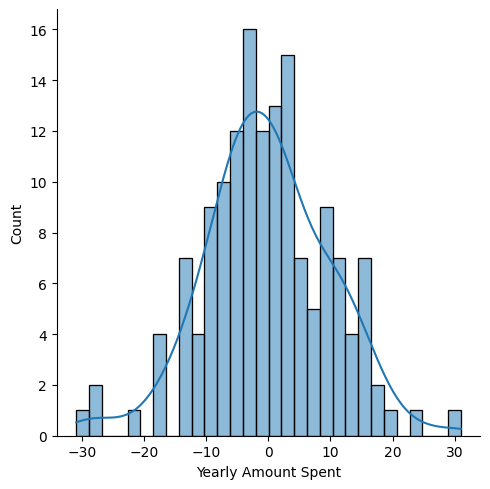

In [55]:
# we want our residuals to seem random - a normal distribution
sns.displot(residuals, bins=30, kde= True)

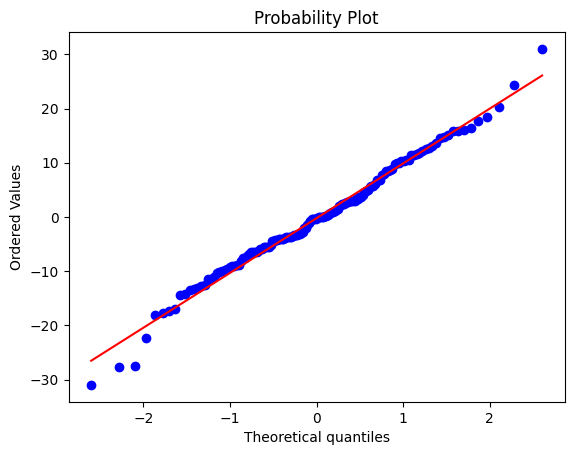

In [60]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

If we have a normal distribution, it should resemble a straight line.